In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [3]:
ticker = 'AAPL'
start_date = '2020-01-01'
end_date = '2021-01-01'
data = yf.download(ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [4]:
def calculate_adx(df, period=14):
    high = df['High']
    low = df['Low']
    close = df['Close']
    
    df['TR'] = np.maximum(high - low, np.maximum(abs(high - close.shift(1)), abs(low - close.shift(1))))

    df['+DM'] = np.where((high - high.shift(1)) > (low.shift(1) - low), np.maximum(high - high.shift(1), 0), 0)
    df['-DM'] = np.where((low.shift(1) - low) > (high - high.shift(1)), np.maximum(low.shift(1) - low, 0), 0)
    

    df['TR'] = df['TR'].rolling(window=period).sum()
    df['+DM'] = df['+DM'].rolling(window=period).sum()
    df['-DM'] = df['-DM'].rolling(window=period).sum()
    

    df['+DI'] = 100 * (df['+DM'] / df['TR'])
    df['-DI'] = 100 * (df['-DM'] / df['TR'])
    

    df['DX'] = 100 * (abs(df['+DI'] - df['-DI']) / (df['+DI'] + df['-DI']))
    df['ADX'] = df['DX'].rolling(window=period).mean()
    
    return df

In [5]:
data = calculate_adx(data)

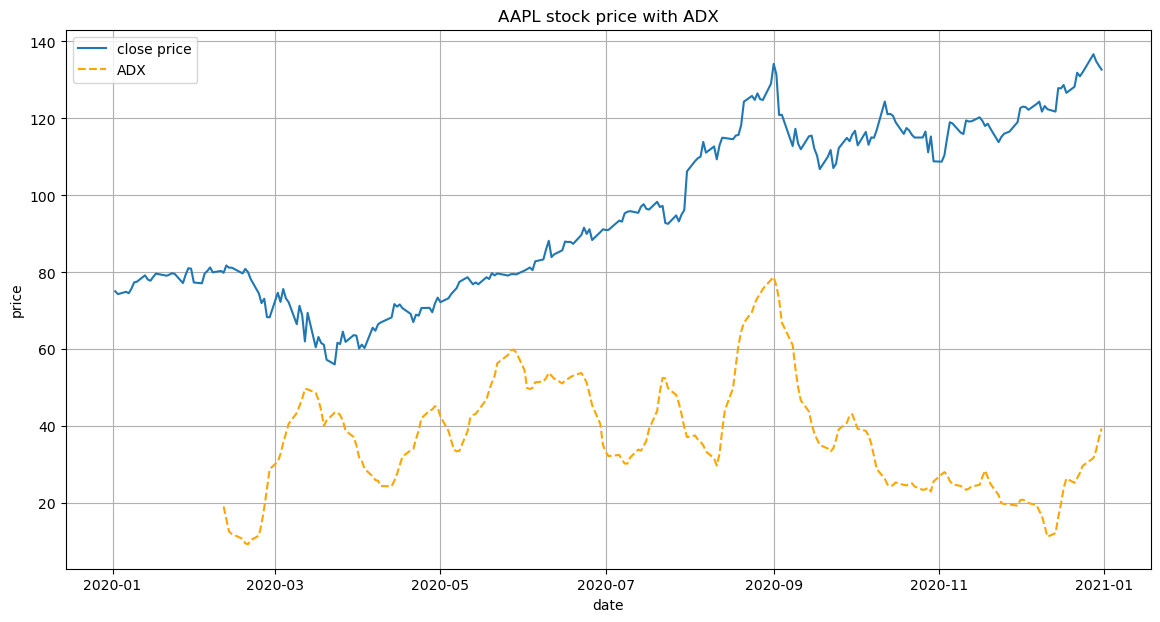

In [7]:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='close price')
plt.plot(data.index, data['ADX'], label='ADX', linestyle='--', color='orange')
plt.title(f'{ticker} stock price with ADX')
plt.xlabel('date')
plt.ylabel('price')
plt.legend()
plt.grid(True)
plt.show()